<a href="https://colab.research.google.com/github/kaynatmozammil/Data-Science-/blob/main/40_session_Destribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import random

In [ ]:
L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)

  L.append(a + b)

In [ ]:
len(L)

10000

In [ ]:
L[:5]

[5, 11, 5, 10, 5]

In [ ]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [ ]:
s

,count
2,0.0294
3,0.0543
4,0.0840
5,0.1093
6,0.1432
7,0.1653
8,0.1378
9,0.1117
10,0.0834
11,0.0555


<Axes: >

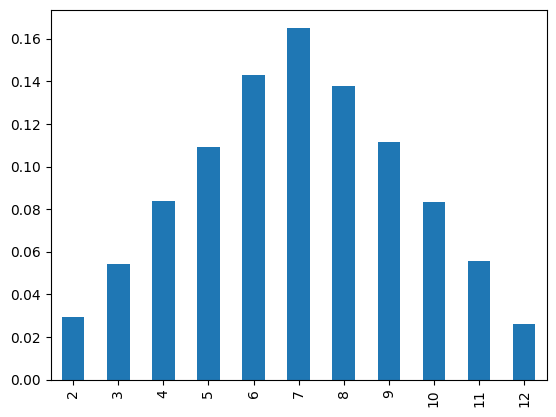

In [ ]:
s.plot(kind='bar')

In [ ]:
import numpy as np
np.cumsum(s)

,count
2,0.0294
3,0.0837
4,0.1677
5,0.2770
6,0.4202
7,0.5855
8,0.7233
9,0.8350
10,0.9184
11,0.9739


<Axes: >

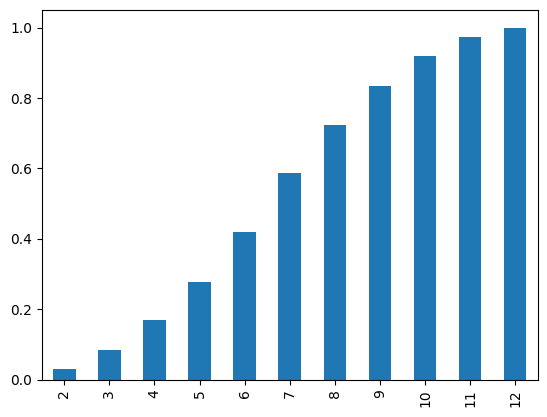

In [ ]:
np.cumsum(s).plot(kind='bar')

<Axes: >

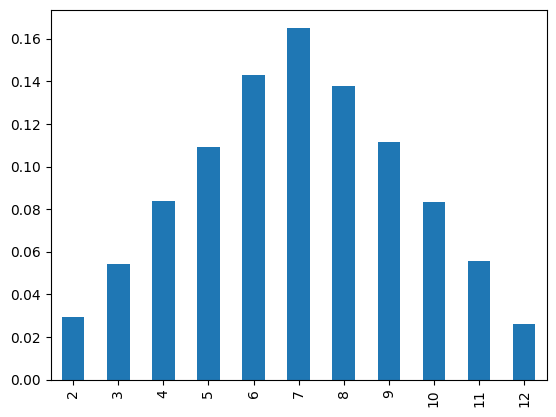

In [ ]:
# PMF
s.plot(kind='bar')

<Axes: >

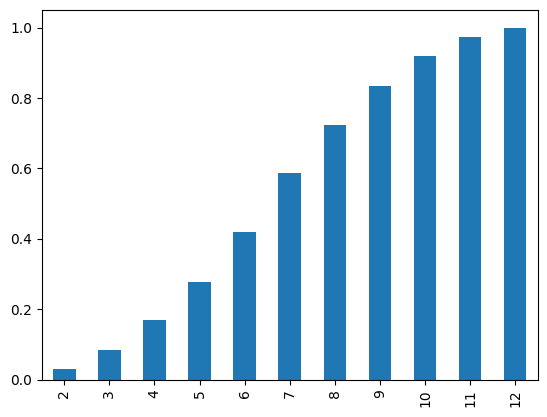

In [ ]:
# CDF of PMF
np.cumsum(s).plot(kind='bar')

### Parametric Density Estimation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample  = normal(loc=50,scale=5,size=1000)

In [ ]:
sample.mean()

np.float64(50.010608443814036)

(array([ 12.,  32., 125., 179., 253., 223., 122.,  43.,   9.,   2.]),
 array([35.01530024, 38.28930991, 41.56331958, 44.83732924, 48.11133891,
        51.38534857, 54.65935824, 57.9333679 , 61.20737757, 64.48138723,
        67.7553969 ]),
 <BarContainer object of 10 artists>)

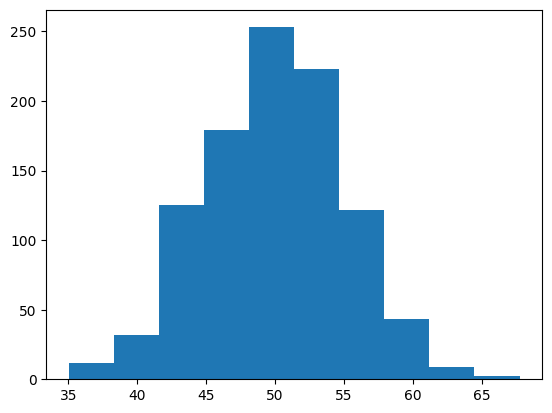

In [ ]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [ ]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [ ]:
# fit the disribution with the above parameter
from scipy.stats import norm
dist  = norm(sample_mean,sample_std)

In [ ]:
values = np.linspace(sample.min(),sample.max(),100)

In [ ]:
sample.min()

np.float64(32.614203476597424)

In [ ]:
sample.max()

np.float64(63.7668761944242)

In [ ]:
probabilities = [dist.pdf(value) for value in values]

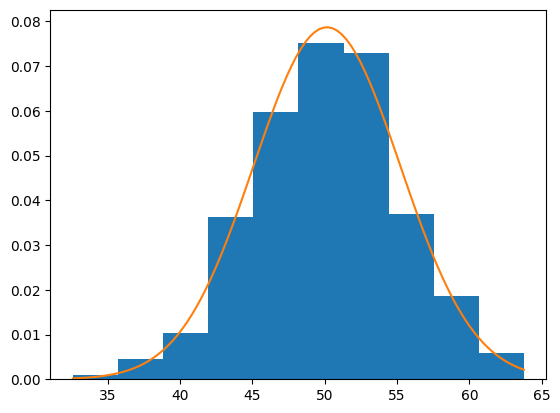

In [ ]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

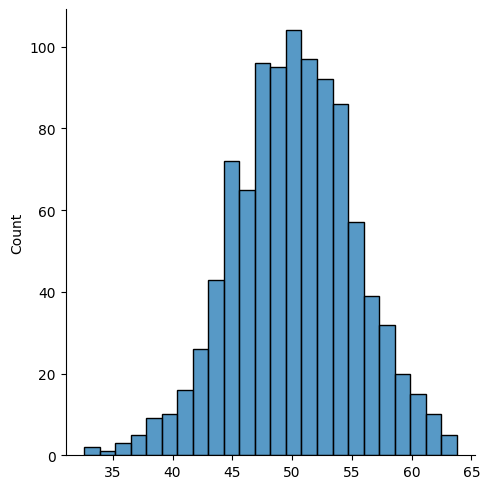

In [ ]:
import seaborn as sns
sns.displot(sample)

### KDE

In [ ]:
sample1 = normal(loc=20 , scale=5 , size = 300)
sample2 = normal(loc = 40 , scale = 5 , size = 700)
sample = np.hstack((sample1,sample2))

In [ ]:
sample

array([14.2373875 , 15.6344082 , 21.07008637, 27.23984511, 24.91288361,
       19.63482783, 26.4225884 , 11.95124907, 33.0287541 , 22.88645886,
       30.39319607, 26.43651816, 27.68494138, 25.09154193, 23.00313156,
       22.58485147, 23.18824995, 17.92065158, 26.96156167, 16.61314655,
       20.93653422, 20.92951595, 15.0921714 , 33.16096889, 24.95892354,
       11.64248794, 18.50748143, 16.21688321, 18.49425606, 17.32378727,
       17.44498572,  9.59131913,  6.31949792, 13.71928738, 20.27394451,
       13.79505672, 14.42421889, 16.22307785, 22.40070739, 13.66853838,
       26.44860138, 20.17308728, 23.14847033, 16.0513902 , 22.17767616,
       22.44466691, 21.74422719, 17.00685378, 14.36360821, 23.99450183,
       13.03740475, 23.30146413, 27.07523961, 13.65535713, 24.14783794,
       17.21045121, 15.91150461, 18.66647177, 15.44461995, 18.33035238,
       12.63302792, 15.63992347, 25.99291904, 22.75431717, 29.16552783,
       22.87698623, 23.48149437, 15.95352514, 26.08610692, 23.63

(array([ 1.,  0.,  1.,  1.,  1.,  1.,  4.,  3.,  4., 13., 11., 14., 17.,
        24., 23., 24., 19., 21., 22., 17., 12., 17., 19., 14.,  7.,  5.,
        11.,  9., 19., 16., 20., 25., 45., 42., 52., 51., 62., 47., 60.,
        56., 52., 44., 23., 20., 20., 12.,  8.,  9.,  1.,  1.]),
 array([ 3.3371729 ,  4.33539407,  5.33361524,  6.33183641,  7.33005758,
         8.32827876,  9.32649993, 10.3247211 , 11.32294227, 12.32116344,
        13.31938461, 14.31760578, 15.31582695, 16.31404812, 17.31226929,
        18.31049046, 19.30871163, 20.3069328 , 21.30515398, 22.30337515,
        23.30159632, 24.29981749, 25.29803866, 26.29625983, 27.294481  ,
        28.29270217, 29.29092334, 30.28914451, 31.28736568, 32.28558685,
        33.28380802, 34.2820292 , 35.28025037, 36.27847154, 37.27669271,
        38.27491388, 39.27313505, 40.27135622, 41.26957739, 42.26779856,
        43.26601973, 44.2642409 , 45.26246207, 46.26068324, 47.25890441,
        48.25712559, 49.25534676, 50.25356793, 51.2517891 ,

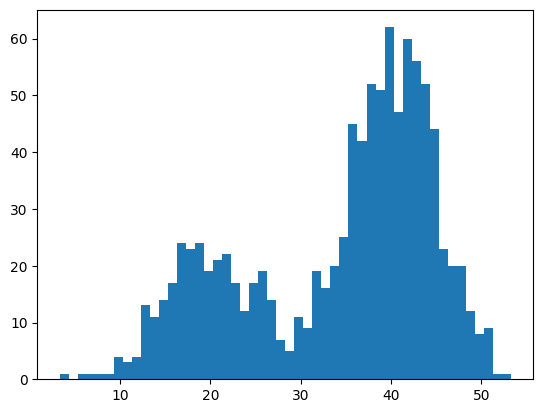

In [ ]:
# plot histogram bins = 50
plt.hist(sample,bins=50)

In [ ]:
from sklearn.neighbors import KernelDensity
model = KernelDensity(kernel='gaussian',bandwidth=3)

# convert data to a 2D array
sample = sample.reshape(len(sample),1)

# fit the model
model.fit(sample)

KernelDensity(bandwidth=3)

In [ ]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values),1))

In [ ]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

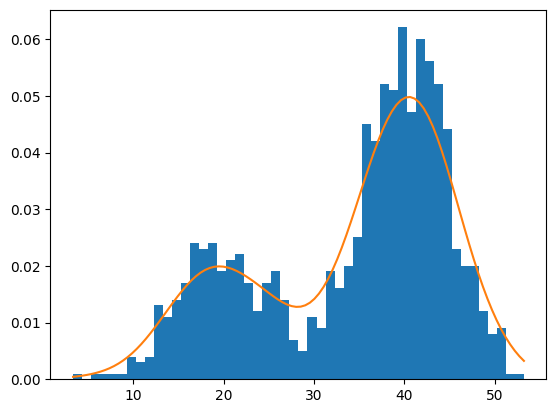

In [ ]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:],probabilities)
plt.show()

In [ ]:
sns.kdeplot(sample,bw_adjust=1)

NameError: name 'sns' is not defined

<Axes: xlabel='petal_width', ylabel='Density'>

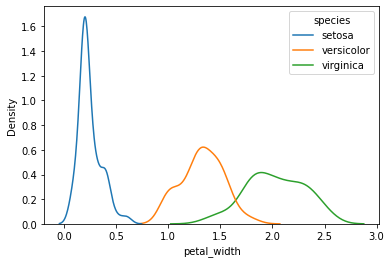

In [ ]:
sns.kdeplot(data=df,x='petal_width',hue='species')

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

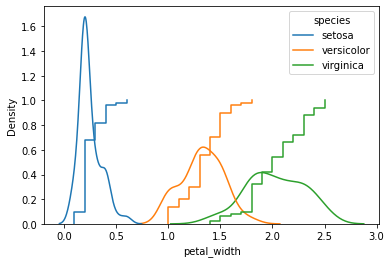

In [ ]:
sns.kdeplot(df['petal_width'],hue=df['species'])
sns.ecdfplot(data=df,x='petal_width',hue='species')

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

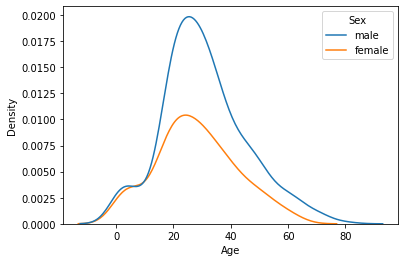

In [ ]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

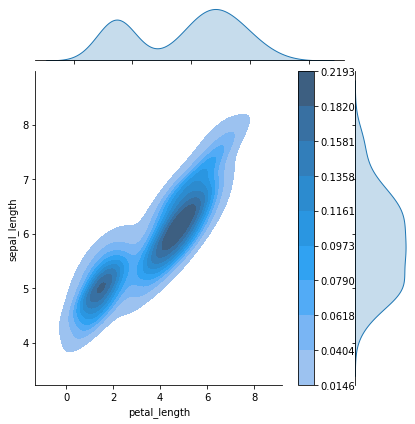

In [ ]:
 sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

<Axes: xlabel='Age', ylabel='Density'>

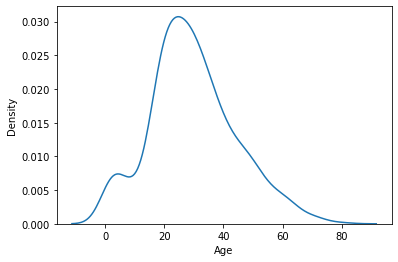

In [ ]:
sns.kdeplot(titanic['Age'])

In [ ]:
titanic['Age'].mean()

29.69911764705882

In [ ]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

<Axes: xlabel='Age', ylabel='Density'>

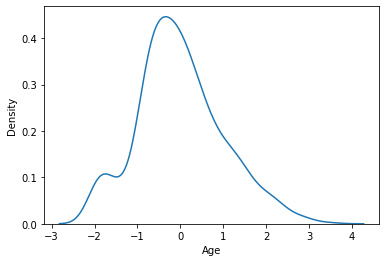

In [ ]:
sns.kdeplot(x)

In [ ]:
x.mean()

2.338621049070358e-16

In [ ]:
x.std()

1.0

In [ ]:
titanic['Age'].skew()

0.38910778230082704

In [ ]:
titanic['Age'].mean() + 3*titanic['Age'].std()

73.27860964406094

In [ ]:
titanic['Age'].mean() - 3*titanic['Age'].std()

-13.880374349943303

In [ ]:
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [ ]:
titanic['Age'].max()

80.0